Importing the Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

Importing the dataset:

In [2]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


Preprocessing the data

In [3]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


EDA:

(array([57., 53., 75., 58., 56., 59., 64., 53., 52., 73.]),
 array([10003. , 18964.6, 27926.2, 36887.8, 45849.4, 54811. , 63772.6,
        72734.2, 81695.8, 90657.4, 99619. ]),
 <BarContainer object of 10 artists>)

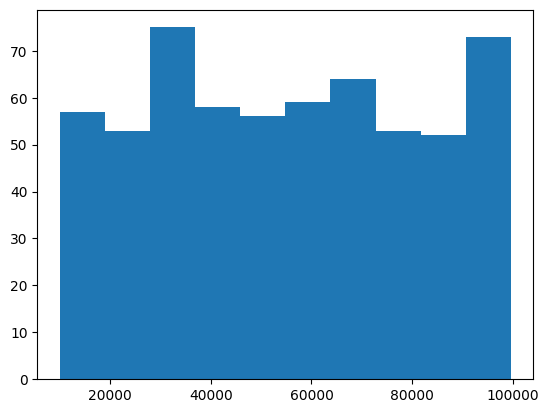

In [4]:
plt.hist(data["Taxable.Income"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7efd6237e590>,
 'caps': [<matplotlib.lines.Line2D at 0x7efd6237ead0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efd6237e410>],
 'medians': [<matplotlib.lines.Line2D at 0x7efd6237f010>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efd6237f2b0>],
 'means': []}

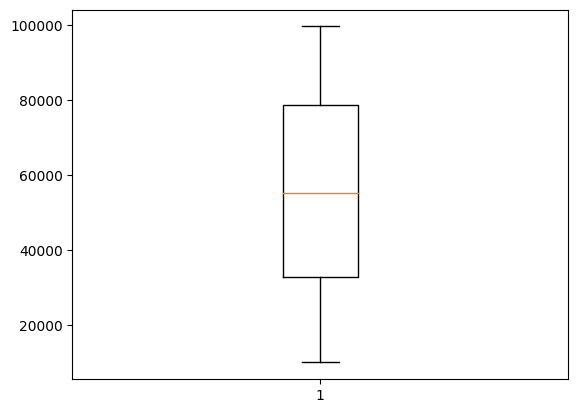

In [5]:
plt.boxplot(data["Taxable.Income"])

In [6]:
# Making a copy of the data before converting the target variable into 0's and 1's
data1 = data.copy()
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


All the values in the Taxable Income column above the value of 30000 can be considered as Good otherwise they will be considered as :

In [7]:
for i in range(len(data1["Taxable.Income"])):
    if data1["Taxable.Income"][i] <= 30000:
        data1["Taxable.Income"][i] = 0
    else:
        data1["Taxable.Income"][i] = 1

In [8]:
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [9]:
# Just checking if there are any errors in the above logic.
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Undergrad,600.0,0.520000,0.500017,0.0,0.00,1.0,1.00,1.0
Marital.Status,600.0,1.046667,0.821958,0.0,0.00,1.0,2.00,2.0
Taxable.Income,600.0,0.793333,0.405252,0.0,1.00,1.0,1.00,1.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0
Urban,600.0,0.503333,0.500406,0.0,0.00,1.0,1.00,1.0


In [10]:
x=data1.loc[:, data1.columns != "Taxable.Income"]
y=data1['Taxable.Income']

In [11]:
data1['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

Splitting the data:

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Building the C5.0 model:

In [13]:
model_c5_0 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model_c5_0.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

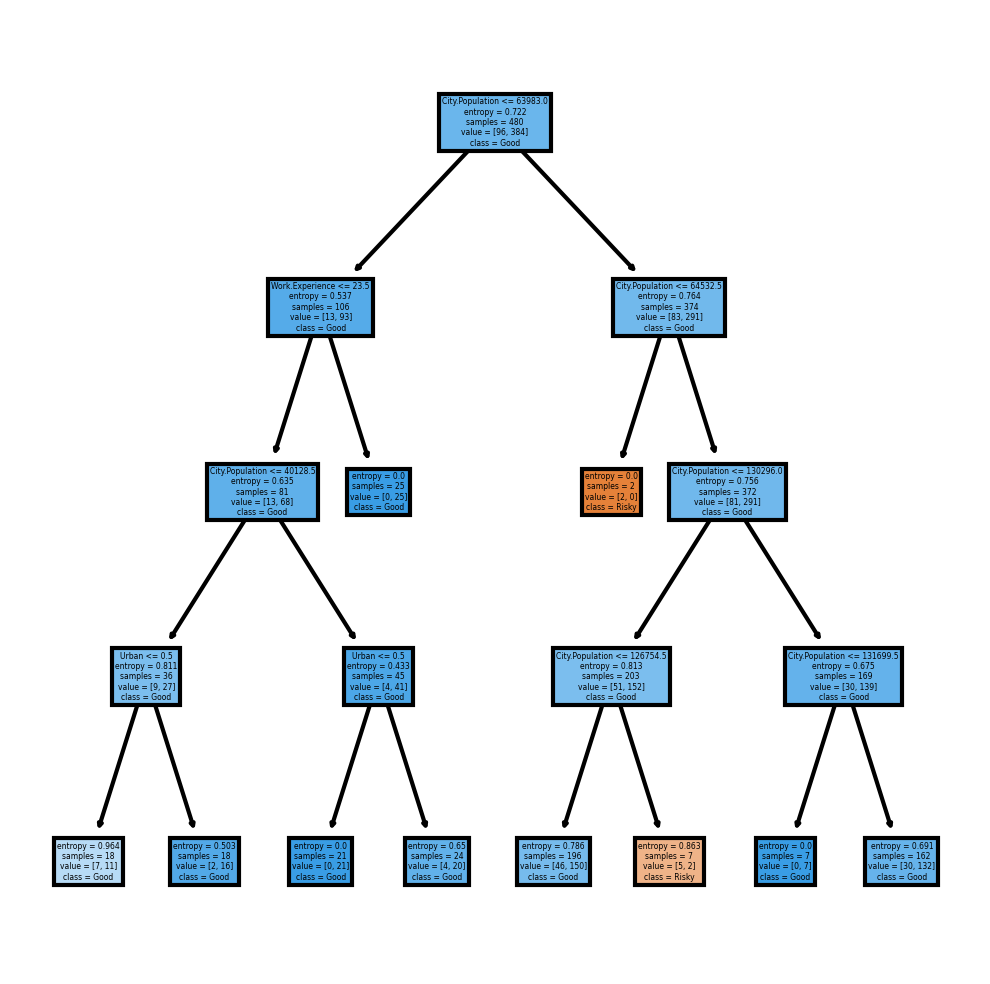

In [14]:
fn= list(x.columns)
cn=["Risky", "Good"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_c5_0,
               feature_names =fn,
               class_names=cn,
               filled = True);

Checking the accuracy of the model:

In [15]:
preds = model_c5_0.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    117
0      3
dtype: int64

In [16]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable.Income,,
0,1,27
1,2,90


In [17]:
print(f"Accuracy: {round(np.mean(preds==y_test)*100, 2)}%")

Accuracy: 75.83%


Best Features found using Entropy method:

In [18]:
feature_imp = pd.Series(model_c5_0.feature_importances_, index= fn).sort_values(ascending=False)
feature_imp

City.Population    0.626466
Urban              0.205741
Work.Experience    0.167793
Undergrad          0.000000
Marital.Status     0.000000
dtype: float64

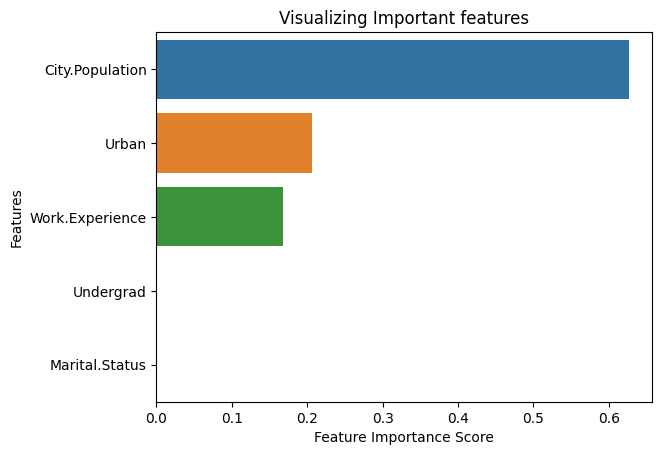

In [19]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

The above features are the best using entropy method for classification of high sales and low sales

Building the CART model:

In [20]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [21]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

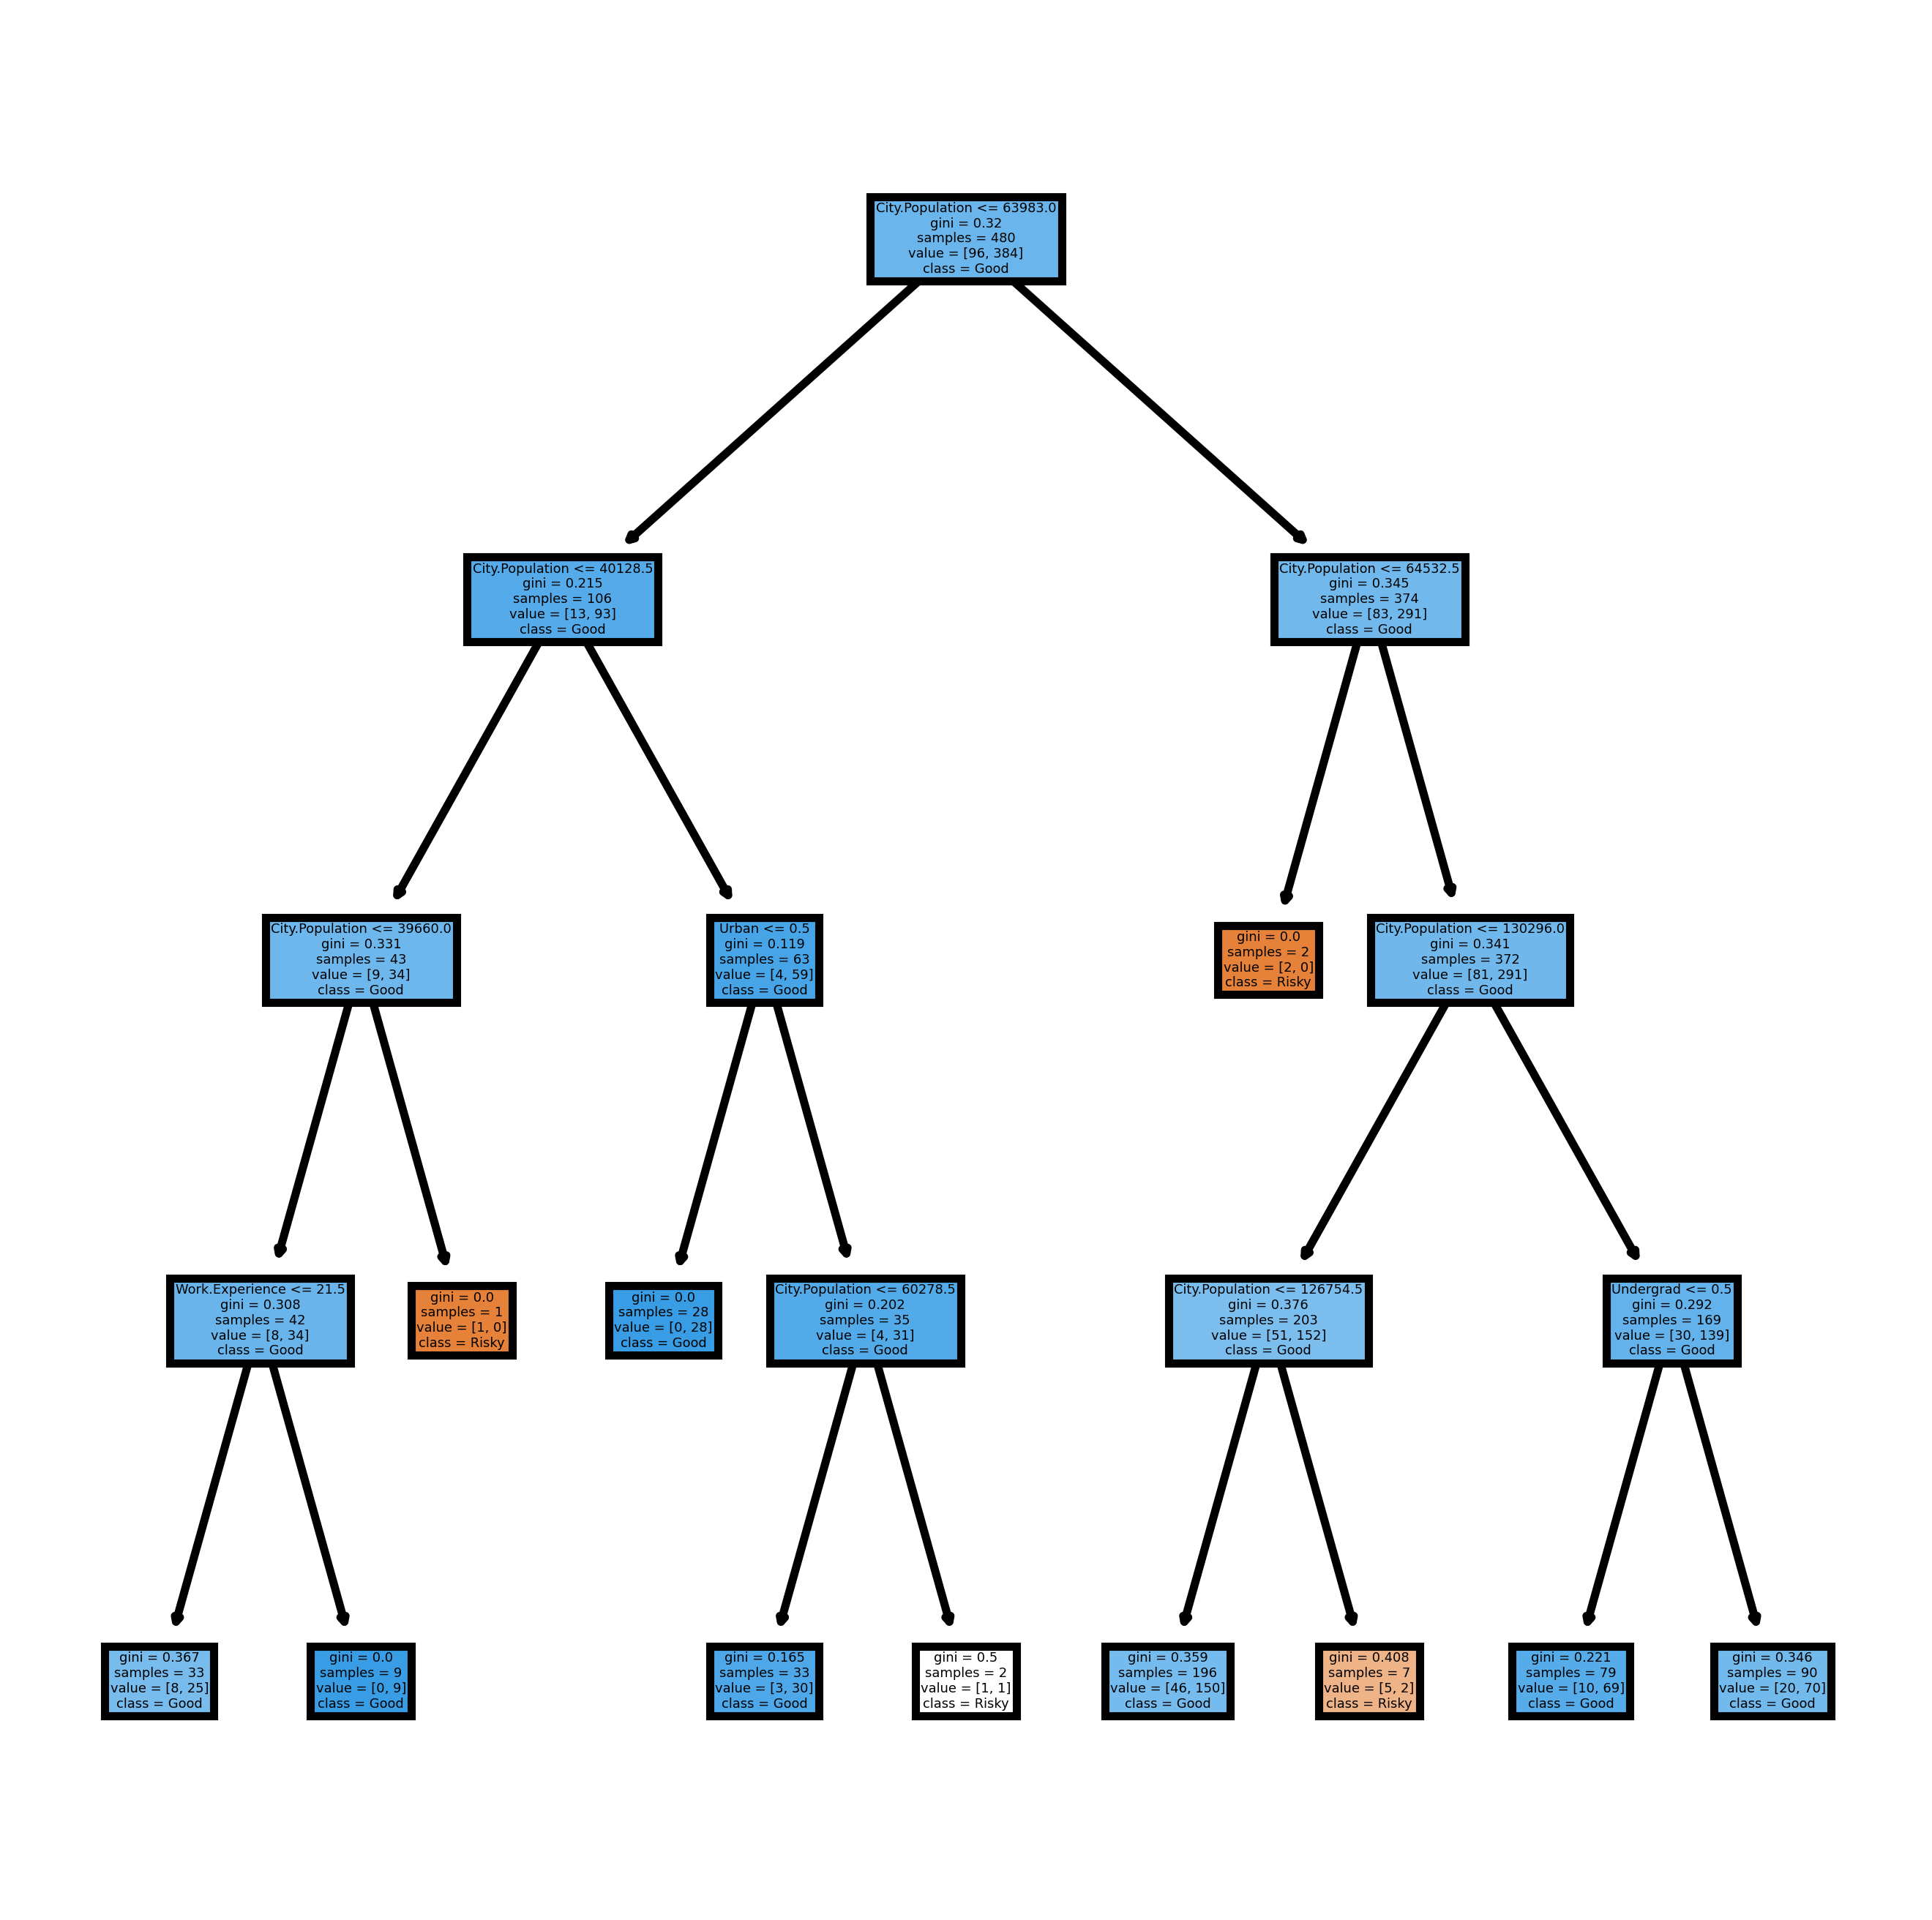

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model_gini,
               feature_names =fn,
               class_names=cn,
               filled = True);

Checking the accuracy of the model:

In [23]:
pred=model_gini.predict(x_test)
print(f"Accuracy: {round(np.mean(pred==y_test)*100, 2)}%")

Accuracy: 75.0%


Best Features found using Gini impurity criteria:

In [24]:
feature_imp_gini = pd.Series(model_gini.feature_importances_, index= fn).sort_values(ascending=False)
feature_imp_gini

City.Population    0.847705
Work.Experience    0.063065
Undergrad          0.058397
Urban              0.030832
Marital.Status     0.000000
dtype: float64

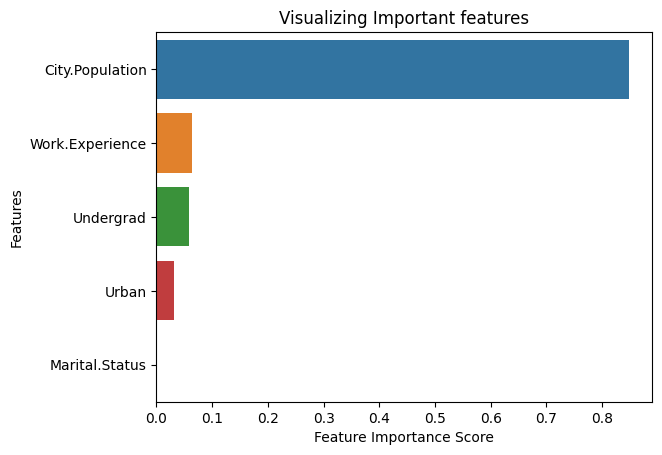

In [25]:
sns.barplot(x=feature_imp_gini, y=feature_imp_gini.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

Preprocessing the data for Regression Decision tree:

In [26]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [27]:
X1 = data.loc[:, data.columns != "Taxable.Income"]
y1 = data["Taxable.Income"]

Splitting the Data:

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=40)

Building the Regression Decision tree using MSE method:

In [30]:
model_regression_DT = DecisionTreeRegressor(criterion="squared_error")
model_regression_DT.fit(X1_train, y1_train)

DecisionTreeRegressor()

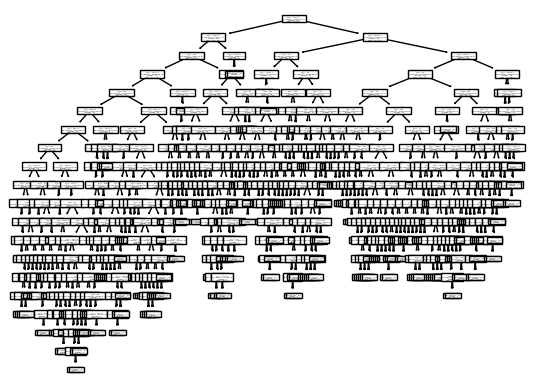

In [31]:
tree.plot_tree(model_regression_DT);

Accuracy:

In [32]:
# print(f"Accuracy: {round(model_regression_DT.score(X1_test,y1_test)*100, 2)}%")
model_regression_DT.score(X1_test,y1_test)

-0.8865765607221989

Observation: we can see that the score here is negative and therefore understand that the model is not being able to make predicitions based on the given data, Therefore a Regression Decision Tree is not a good idea here